# LCD Language Analysis

## Graphics design

-Graphics-
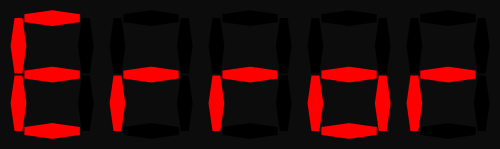

In [17]:
model = {{0, 0}, {0.2, 0}, {0.3, 0.7}, {0.2, 1.4}, {0, 1.4}, {-0.1, 0.7}};

LCD = <|
   1 -> Polygon[model],
   2 -> Polygon[Map[# + {1.7, 0} &] @ model],
   3 -> Polygon[Map[RotationMatrix[\[Pi]/2].(# + {-0.1, -1.65}) &] @ model],
   4 -> Polygon[Map[RotationMatrix[\[Pi]/2].(# + {-0.1 + 1.425, -1.65}) &] @ model],
   5 -> Polygon[Map[# + {0, 1.45} &] @ model],
   6 -> Polygon[Map[# + {1.7, 1.45} &] @ model],
   7 -> Polygon[Map[RotationMatrix[Pi/2].(# + {-0.1 + 2 1.425, -1.65}) &] @ model]
|>;

back = Table[LCD[i], {i, 7}];

LCDScreen[l_List] := Graphics[
    Join @@ Table[
    {
         Black, 
         Translate[back, {(i - 1)*2.5, 0}], 
         Red, 
         Translate[LCD /@ l[[i]], {(i - 1)*2.5, 0}]
    }, {i, Length[l]}], 
    Background -> GrayLevel[0.05], 
    ImageSize -> 100*Length[l]
]

LCDAlphabet = <|
    "a" -> {1, 2, 4, 5, 6, 7}, 
    "b" -> {1, 2, 3, 4, 5}, 
    "c" -> {1, 3, 5, 7}, 
    "d" -> {1, 2, 3, 4, 6}, 
    "e" -> {1, 3, 4, 5, 7}, 
    "f" -> {1, 4, 5, 7}, 
    "h" -> {1, 2, 4, 5, 6}, 
    "j" -> {1, 2, 3, 6}, 
    "l" -> {1, 3, 5}, 
    "n" -> {1, 2, 4}, 
    "o" -> {1, 2, 3, 4}, 
    "p" -> {1, 4, 5, 6, 7}, 
    "r" -> {1, 4}, 
    "s" -> {2, 3, 4, 5, 7}, 
    "t" -> {1, 3, 4, 5}, 
    "u" -> {1, 2, 3, 5, 6}, 
    "y" -> {2, 3, 4, 5, 6}, 
    "-" -> {4}, 
    "'" -> {6}
|>;

admitted = StringReplace[StringJoin @@ Keys[LCDAlphabet], {"-" -> "\\-", "'" -> "\\'"}];

PrintLCD[s_String] := LCDScreen[LCDAlphabet /@ Characters[ToLowerCase@s]]

PrintLCD["error"]

## Check Aviable Languages

Get the data from Wikipedia

In [12]:
data = WikipediaData["List of languages by writing system"];

Isolate latin languages

In [13]:
fromLatin = StringTake[data, {StringPosition[data, "== Latin script =="][[1, 2]] + 2, StringLength[data]}];
latin = StringTake[fromLatin, StringPosition[fromLatin, "=="][[1, 1]] - 1];

Remove parenthesis annotations

In [15]:
latin = StringReplace[latin, RegularExpression["\\([\\S\\s]+?\\)"] -> ""];

Split between spaces (linebreaks, spaces...)

In [16]:
languages = StringSplit[StringReplace[latin, RegularExpression["\\s+"] -> ","], ","];

Filter languages that have `WordList[]`

In [25]:
languages = Select[languages, Not[Quiet@Check[WordList[Language -> #], 1] === 1] &]

{Breton, Catalan, Croatian, Danish, Dutch, English, Esperanto, Faroese, Finnish, French, 
 
>   Galician, German, Hungarian, Italian, Latin, Polish, Portuguese, Spanish, Swedish, 
 
>   Arabic}

Delete Arabic

In [26]:
languages = DeleteCases[languages, a_ /; a == "Arabic"]

{Breton, Catalan, Croatian, Danish, Dutch, English, Esperanto, Faroese, Finnish, French, 
 
>   Galician, German, Hungarian, Italian, Latin, Polish, Portuguese, Spanish, Swedish}

## The longest 10 words printable in LCD

In [36]:
SetDirectory["results"];

In [37]:
LCDLanguage[lang_String] := Block[{filtered, words, current, i, selected},
    filtered = Select[ToLowerCase /@ WordList[Language->lang], StringMatchQ[#,RegularExpression["["<>admitted<>"]*"]]&];
    words = MaximalBy[filtered, StringLength, 80];
    current = words; (* filter words that starts with the same 5 characters *)
    i = 1;
    While[i <= Length[current],
        current = {current[[i]]}~Join~DeleteCases[current,a_/;StringPosition[a,StringTake[current[[i]], 5]] != {}];
        i++
    ];
    selected = MaximalBy[current, StringLength, 10];
    GraphicsGrid[
    Transpose[{PrintLCD /@ selected}],
    AspectRatio -> 1,
    Background -> GrayLevel[0.05],
    ImageSize -> 2000
    ]
]  

In [38]:
Do[
    Export[languages[[n]] <> ".png", LCDLanguage[languages[[n]]]];
    Print["Exported ", languages[[n]]],
{n, Length[languages]}]

Exported Breton
Exported Catalan
Exported Croatian
Exported Danish
Exported Dutch
Exported English
Exported Esperanto
Exported Faroese
Exported Finnish
Exported French
Exported Galician
Exported German
Exported Hungarian
Exported Italian
Exported Latin
Exported Polish
Exported Portuguese
Exported Spanish
Exported Swedish
